In [1]:
%pylab inline
from astropy.table import Table
from rnn import RNNClassifier
import tensorflow as tf
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Loading dataset
data_table = Table.read('normalized_good.fits')

In [3]:
# Splitting training and testing data
np.random.seed(1234)
randomize_inds = range(len(data_table))
randomize_inds = permutation(randomize_inds)
randomized_inds_train = randomize_inds[0:15000]
randomized_inds_test  = randomize_inds[15000:]

In [4]:
randomized_inds_test[0:10]

array([16968, 10968,  1867,  9834,  6827,  2981,  3540,  4520, 17130,
        2679])

In [5]:
data_table['label'] = 1.0*(data_table['SNTYPE'].astype('int') == 1)

In [6]:
# Define input function for training 
def input_fn_train():
    def mapping_function(x):
        def extract_batch(inds):
            inds = randomized_inds_train[inds]
            return data_table['label'][inds].astype('float32'), clip(data_table['num_data_points'][inds],0,49).astype('int32'),data_table['DATA'][inds].astype('float32') 
        a,b,c =tf.py_func( extract_batch, [x], [tf.float32, tf.int32, tf.float32])
        a.set_shape([None])
        b.set_shape([None])
        c.set_shape([None,50,9])
        return a,b,c

    dataset = tf.data.Dataset.range(len(randomized_inds_train))
    dataset = dataset.repeat().shuffle(10000).batch(512)
    dataset = dataset.map( mapping_function)
    iterator = dataset.make_one_shot_iterator()
    label, length, ts = iterator.get_next()
    return  {'length':length, 'ts':ts}, label

def input_fn_train_test():
    def mapping_function(x):
        def extract_batch(inds):
            inds = randomized_inds_train[inds]
            return data_table['label'][inds].astype('float32'), clip(data_table['num_data_points'][inds],0,49).astype('int32'),data_table['DATA'][inds].astype('float32')
        a,b,c =tf.py_func( extract_batch, [x], [tf.float32, tf.int32, tf.float32])
        a.set_shape([None])
        b.set_shape([None])
        c.set_shape([None,50,9])
        return a,b,c

    dataset = tf.data.Dataset.range(len(randomized_inds_train))
    dataset = dataset.batch(512)
    dataset = dataset.map( mapping_function)
    iterator = dataset.make_one_shot_iterator()
    label, length, ts = iterator.get_next()
    return  {'length':length, 'ts':ts}, label

def input_fn_test():
    def mapping_function(x):
        def extract_batch(inds):
            inds = randomized_inds_test[inds]
            return data_table['label'][inds].astype('float32'), clip(data_table['num_data_points'][inds],0,49).astype('int32'),data_table['DATA'][inds].astype('float32') 
        a,b,c =tf.py_func( extract_batch, [x], [tf.float32, tf.int32, tf.float32])
        a.set_shape([None])
        b.set_shape([None])
        c.set_shape([None,50,9])
        return a,b,c

    dataset = tf.data.Dataset.range(len(randomized_inds_test))
    dataset = dataset.batch(512)
    dataset = dataset.map( mapping_function)
    iterator = dataset.make_one_shot_iterator()
    label, length, ts = iterator.get_next()
    return  {'length':length, 'ts':ts}, label

In [7]:
#model = RNNClassifier(hidden_units=[128, 128], dropout=1, model_dir='tests/test_1')
#model = RNNClassifier(hidden_units=[128, 128], dropout=0.8, model_dir='tests/test_2')
model = RNNClassifier(hidden_units=[128, 128], dropout=0.8, model_dir='tests/test_6')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tests/test_5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9545d41ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
model.train(input_fn=input_fn_train, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into tests/test_5/model.ckpt.
INFO:tensorflow:loss = 0.6829017, step = 0
INFO:tensorflow:global_step/sec: 17.0567
INFO:tensorflow:loss = 0.5009535, step = 100 (5.864 sec)
INFO:tensorflow:global_step/sec: 17.6984
INFO:tensorflow:loss = 0.2535687, step = 200 (5.650 sec)
INFO:tensorflow:global_step/sec: 17.7088
INFO:tensorflow:loss = 0.20246531, step = 300 (5.647 sec)
INFO:tensorflow:global_step/sec: 17.7007
INFO:tensorflow:loss = 0.21160588, step = 400 (5.649 sec)
INFO:tensorflow:global_step/sec: 17.7183
INFO:tensorflow:loss = 0.2248326, step = 500 (5.644 sec)
INFO:tensorflow:global_step/sec: 17.714
INFO:tensorflow:loss = 0.16444008, step = 600 (5.645 sec)
INFO:tensorflow:global_step/sec: 17.6656
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 17.672
INFO:tensorflow:loss = 0.10207362, step = 8000 (5.659 sec)
INFO:tensorflow:global_step/sec: 17.6845
INFO:tensorflow:loss = 0.14945957, step = 8100 (5.655 sec)
INFO:tensorflow:global_step/sec: 17.7102
INFO:tensorflow:loss = 0.132005, step = 8200 (5.646 sec)
INFO:tensorflow:global_step/sec: 17.7015
INFO:tensorflow:loss = 0.08925619, step = 8300 (5.649 sec)
INFO:tensorflow:global_step/sec: 17.665
INFO:tensorflow:loss = 0.10857395, step = 8400 (5.661 sec)
INFO:tensorflow:global_step/sec: 17.6899
INFO:tensorflow:loss = 0.13210581, step = 8500 (5.653 sec)
INFO:tensorflow:global_step/sec: 17.7405
INFO:tensorflow:loss = 0.13521011, step = 8600 (5.637 sec)
INFO:tensorflow:global_step/sec: 17.6322
INFO:tensorflow:loss = 0.11944683, step = 8700 (5.672 sec)
INFO:tensorflow:global_step/sec: 17.6883
INFO:tensorflow:loss = 0.11658243, step = 8800 (5.653 sec)
INFO:tensorflow:global_step/sec: 17.6596
INFO:tensorflow:loss = 0.10612097, step = 8900 (5.663 sec)
INFO

In [ ]:
#Francois thank you so much!

In [9]:
# Apply model to test set
test_prob = [p['prob'] for p in model.predict(input_fn_test)]
table_test = data_table[randomized_inds_test]
table_test['p'] = test_prob

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tests/test_5/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [10]:
# Apply model to training set
train_prob = [p['prob'] for p in model.predict(input_fn_train_test)]
table_train = data_table[randomized_inds_train]
table_train['p'] = train_prob

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tests/test_5/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


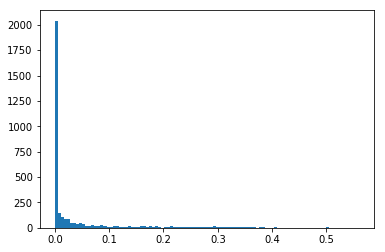

In [11]:
hist(test_prob,100);

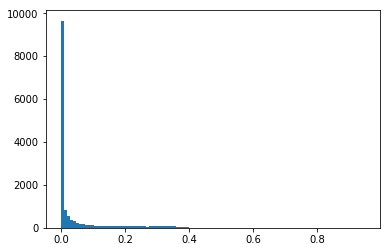

In [12]:
hist(train_prob,100);

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(0, 1)

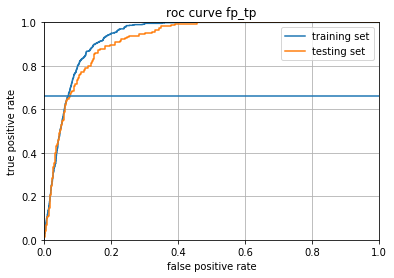

In [13]:
# Compute ROC curves 
from sklearn.metrics import roc_curve

fpr1, tpr1, thr1 = roc_curve(table_train['label'], table_train['p'])
fpr2, tpr2, thr2 = roc_curve(table_test['label'], table_test['p'])

plot(fpr1, tpr1,label='training set')
plot(fpr2, tpr2,label='testing set')
title("roc curve fp_tp")
xlabel('false positive rate')
ylabel('true positive rate')
grid('on')
#xscale('log')
legend()
axhline(0.661)
xlim(0,1)
ylim(0,1)

In [14]:
from sklearn.metrics import roc_auc_score

In [15]:
roc_auc_score(table_train['label'], table_train['p'])

0.9332667462082419

In [16]:
roc_auc_score(table_test['label'], table_test['p'])

0.9186332209588024

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


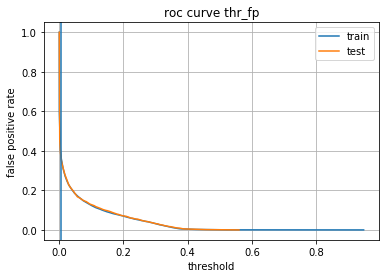

In [17]:
plot(thr1,fpr1,label='train')
plot(thr2, fpr2,label='test')
title("roc curve thr_fp")
xlabel('threshold')
ylabel('false positive rate')
grid('on')
legend()
axvline(0.0043)

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


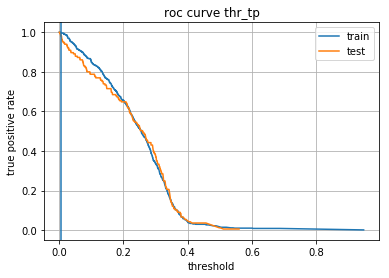

In [18]:
plot(thr1,tpr1,label='train')
plot(thr2, tpr2,label='test')
title("roc curve thr_tp")
xlabel('threshold')
ylabel('true positive rate')
grid('on')
legend()
axvline(0.0043)